 K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

# Import libraries 

In [41]:
#importing Libraries.
import pandas as pd #for data manupulation or analysis
import numpy as np # for mumeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [42]:
#import the dataframe as dataset.
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory data analysis 

In [43]:
data.shape

(250, 5)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [45]:
#View the statistical summary of numerical variables
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [47]:
# view the labels in the variable

data['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [48]:
# view how many different types of variables are there

len(data['Spending Score (1-100)'].unique())

84

In [49]:
# view the labels in the variable

data['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [50]:
# view how many different types of variables are there

len(data['CustomerID'].unique())

250

# Data visualization

<AxesSubplot:>

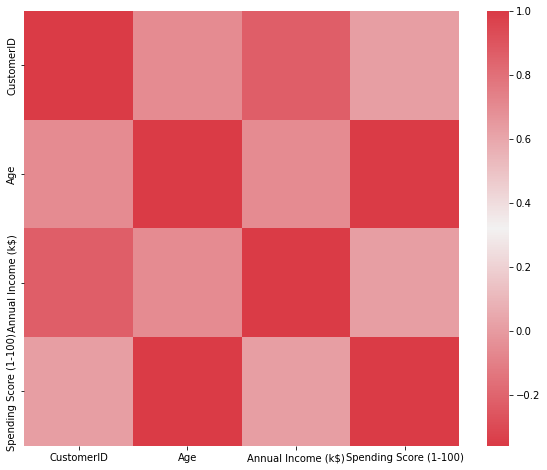

In [51]:
# correlation plot

f, ax = plt.subplots(figsize = (10, 8))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

# Convert categorical variable into integers

In [52]:
y = data['Gender']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

y = le.transform(y)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              250 non-null    int64
 1   Gender                  250 non-null    int32
 2   Age                     250 non-null    int64
 3   Annual Income (k$)      250 non-null    int64
 4   Spending Score (1-100)  250 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 8.9 KB


In [54]:
x = data.iloc[:, [3, 4]].values  
print(x.shape)

(250, 2)


# find optimal number of clusters

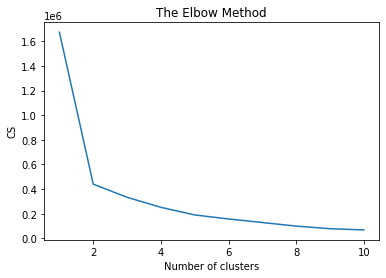

In [55]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

After that, we have initialized the for loop for the iteration on a different value of k ranging from 1 to 10; since for loop in Python, exclude the outbound limit, so it is taken as 11 to include 10th value.
By the above plot, we can see that there is a kink at k=2.Hence k=2 can be considered a good number of the cluster to cluster this data.

In [56]:
from sklearn.cluster import KMeans

labels = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= labels.fit_predict(x)  

In [61]:
# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 39 out of 250 samples were correctly labeled.
Accuracy score: 0.16


 So, our weak unsupervised classification model achieved a very weak classification accuracy of 0%.I will check the model accuracy with different number of clusters.

# K-Means model with 3 clusters

In [62]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 108 out of 250 samples were correctly labeled.
Accuracy score: 0.43


 So, our unsupervised classification model achieved classification accuracy of 43%.I will check the model accuracy with different number of clusters.

# K-Means model with 4 clusters

In [63]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 39 out of 250 samples were correctly labeled.
Accuracy score: 0.16


 We have achieved a relatively high accuracy of 43% with k=3.

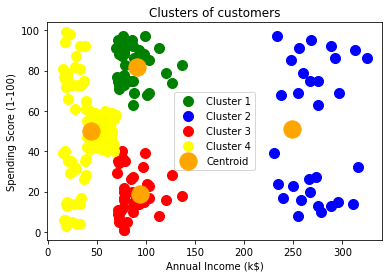

In [64]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4') #for fourth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'orange', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  

 In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.
I have achieved a weak classification accuracy of 0% with k=2 by our unsupervised model.So, I have changed the value of k and find relatively higher classification accuracy of 43% with k=3.I have achieved classification accuracy of 42% with k=3 it is
also weak so continue same thing and check the value of k=5 but classification accuracy decreased of 16% with k=4.Hence, we can conclude that k=3 being the optimal number of clusters.